In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./input/dataset_small.csv")

In [4]:
df.shape

(58645, 112)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


In [7]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

/tmp/ipykernel_1887/2386786340.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, 0], kde=True)


<Axes: xlabel='qty_dot_url', ylabel='Density'>

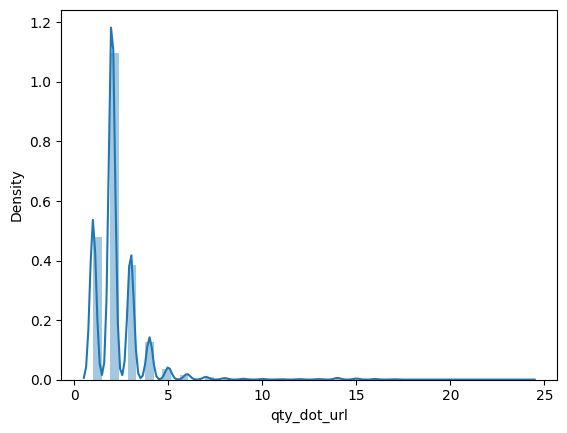

In [11]:
# Pregnancies -> Median
sns.distplot(df.iloc[:, 0], kde=True)

In [12]:
feature_5  = df.columns[:5]

<Axes: >

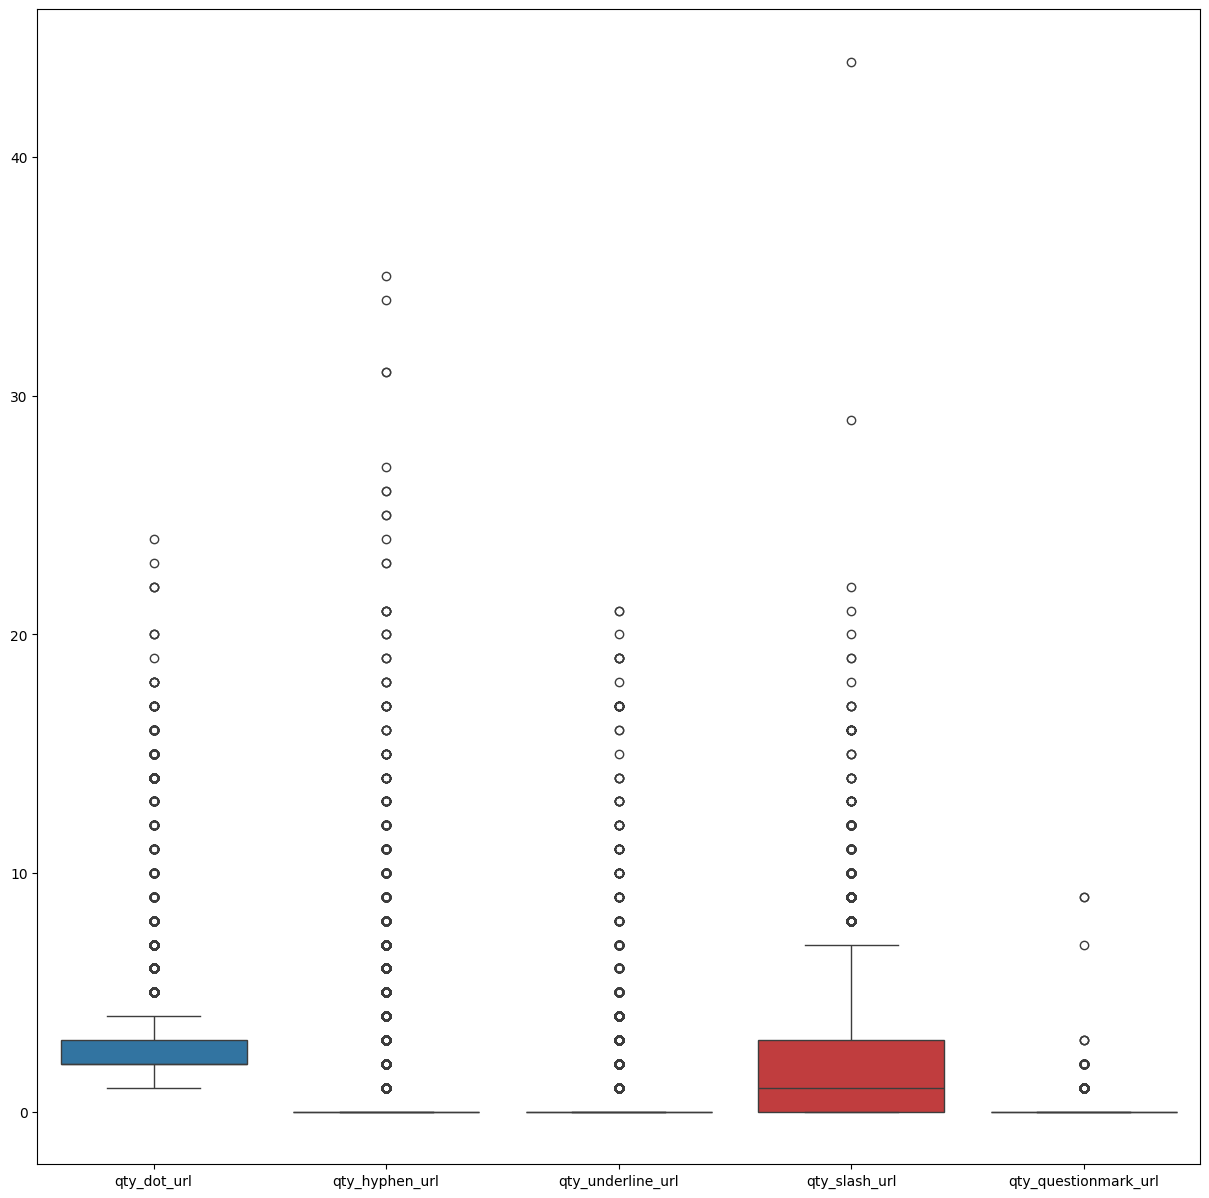

In [14]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = df[feature_5], ax=ax)


In [17]:
X = df.drop('phishing', axis=1)
y = df['phishing']

for col in df.columns[:-1]:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)

In [18]:
X_outlier_detection = X[mask]
y_outlier_detection = y[mask]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

In [22]:
new_df = pd.DataFrame(X_scaled, columns=X_outlier_detection.columns)

In [24]:
new_df.shape

(58159, 111)

In [25]:
new_df.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)

In [27]:
y_outlier_detection.shape

(58159,)

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(new_df, y_outlier_detection, test_size=0.3, random_state=42)

In [29]:
len(Xtrain), len(Xtest), len(ytrain), len(ytest)

(40711, 17448, 40711, 17448)

In [30]:
Xtrain.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
tls_ssl_certificate     0
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
Length: 111, dtype: int64

In [31]:
train_df = pd.DataFrame(Xtrain, columns=df.columns[:-1])
train_df["phishing"] = ytrain
test_df = pd.DataFrame(Xtest, columns=df.columns[:-1])
test_df["phishing"] = ytest

In [34]:
train_df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [32]:
train_df.phishing.isnull().sum()

0

In [33]:
test_df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [35]:
train_df.to_csv("./input/train.csv", index=False)
test_df.to_csv("./input/test.csv", index=False)